In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('german_credit_data.csv')
df.head()

,ID,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [2]:
print("Tenemos {} filas".format(df.shape[0]))

Tenemos 1000 filas


#### Observaciones duplicadas

In [3]:
print(f'Tenemos {df.duplicated().sum()} observaciones duplicadas')

Tenemos 0 observaciones duplicadas


#### NaN Values

In [4]:
print(f'Tenemos {df.isna().sum().sum()} valores NaN')

Tenemos 577 valores NaN


In [5]:
df.isna().sum()

ID                    0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [6]:
df['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [7]:
df['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

#### Que genero tiene mayor cantidad de credito

In [8]:
df.groupby('Sex').mean()['Credit amount']

Sex
female    2877.774194
male      3448.040580
Name: Credit amount, dtype: float64

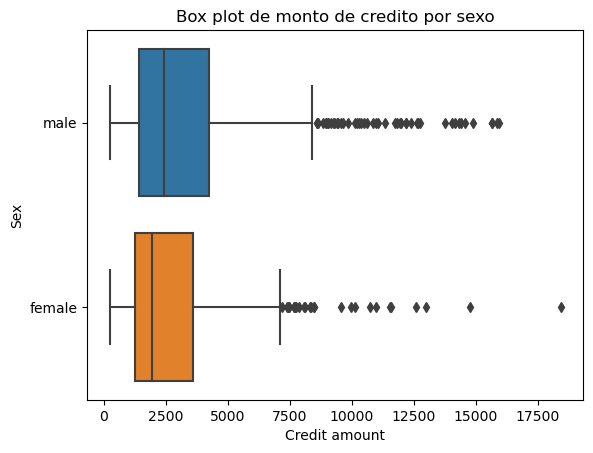

In [9]:
sns.boxplot(data=df, x='Credit amount', y='Sex')
plt.title("Box plot de monto de credito por sexo")
plt.show()

#### Que proposito tienen en mayor frecuencia los creditos de mayor duracion?

In [10]:
df['Purpose'].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64

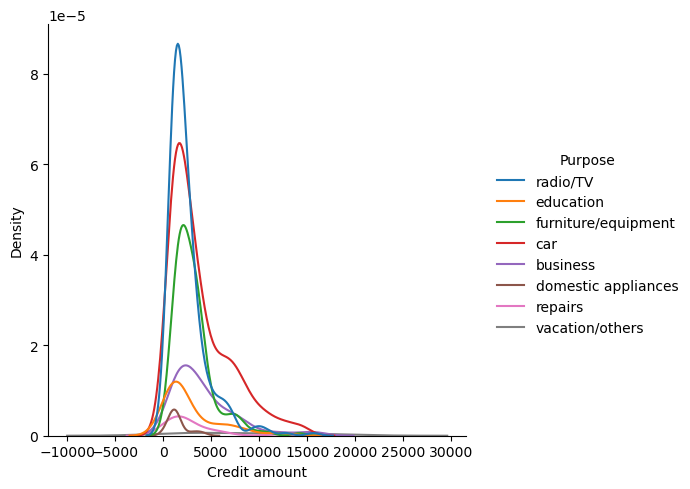

In [11]:
sns.displot(data=df, x='Credit amount', hue='Purpose', kind='kde')

In [12]:
df.describe()

,ID,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.498000,35.546000,1.904000,3271.258000,20.903000
std,288.822226,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


/opt/anaconda3/envs/DeepLearningPytorch/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Distribution plot de monto de credito segun el proposito')

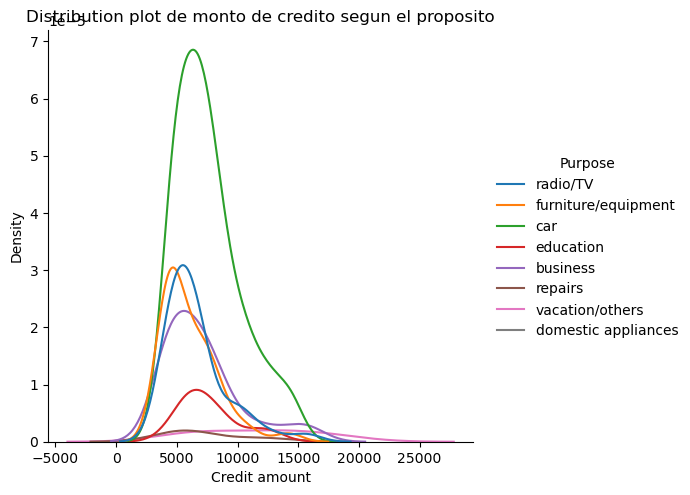

In [13]:
sns.displot(data=df[df['Credit amount'] > 3972], x='Credit amount', hue='Purpose', kind='kde')
plt.title("Distribution plot de monto de credito segun el proposito")